In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [54]:
import torch

from sent_order.models.kt_regression import SentenceEncoder, Regressor, Corpus
from sent_order.perms import sample_uniform_perms

In [8]:
sent_encoder = torch.load(
    '../../data/models/new/kt-reg/sent_encoder.68.bin',
    map_location={'cuda:0': 'cpu'},
)

In [ ]:
regressor = torch.load(
    '../../data/models/new/kt-reg/regressor.68.bin',
    map_location={'cuda:0': 'cpu'},
)

In [11]:
train = Corpus('../../data/train.json/', 1000)

100%|██████████| 1000/1000 [00:00<00:00, 7273.52it/s]


In [15]:
grafs = [g for g in train.grafs if len(g.sentences) == 5]

In [16]:
len(grafs)

174

In [83]:
graf = grafs[60]

In [84]:
[' '.join(s.tokens) for s in graf.sentences]

['Toroidal carbon nanotubes can serve as hosts for encapsulated loops of atomic metal wires .',
 'Such composite structures have been analyzed using density functional theory for a semiconducting C$ _ { 120}$ torus encapsulating chains of Fe , Au and Cu atoms .',
 'The sheathed metal necklaces form a zigzag structure and drops the HOMO / LUMO bandgap to less than 0.1 eV.',
 'The iron composite is ferromagnetic with a magnetic moment essentially the same as that of bcc iron .',
 'The azimuthal symmetry of these toroidal composites suggests that they may offer novel elecromagnetic properties not associated with straight , metal - encapsulated carbon nanotubes .']

In [85]:
sents = sent_encoder(graf.sentence_variables())

In [86]:
sents

Variable containing:
-3.3194e-02 -3.0750e-03 -4.6915e-03  ...   3.9306e-02 -8.6441e-04  4.4244e-03
-1.6336e-03 -2.0112e-03  3.5298e-03  ...   1.9091e-02  4.6219e-04  1.0170e-03
 6.9943e-03 -7.1878e-03  1.3716e-02  ...  -2.6879e-05 -2.8497e-04 -1.0600e-03
-1.9548e-02  7.6715e-03 -4.1441e-03  ...   3.9916e-03 -1.0359e-06  4.8309e-04
-1.0048e-02 -1.2813e-03 -2.5736e-03  ...   2.3983e-04  5.0534e-05 -3.9310e-04
[torch.FloatTensor of size 5x1000]

In [87]:
regressor(sents.unsqueeze(0))

Variable containing:
1.00000e-03 *
  5.8760
[torch.FloatTensor of size 1]

In [88]:
perms, kts = sample_uniform_perms(5)

In [89]:
kt_pred = []
for perm in perms:
    perm = torch.LongTensor(perm)
    kt = regressor(sents[perm].unsqueeze(0)).data[0]
    kt_pred.append(kt)

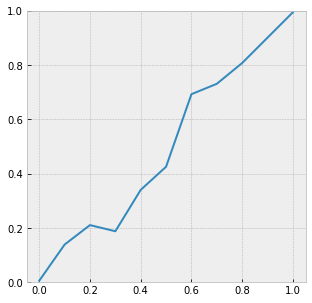

In [90]:
plt.figure(figsize=(5,5))
plt.ylim(0, 1)
plt.plot(kts, kt_pred)